[![CyVers](https://i.imgur.com/yyhmZET.png)](https://www.cyvers.ai/)

# BlockChain Attack Data Set - Exploratory Data Analysis (EDA)

> Notebook by:
> - Royi Avital Royi@cyverse.com

## Revision History

| Version | Date       | Content / Changes                      |
|---------|------------|----------------------------------------|
| 0.1.000 | 30/06/2022 | First version                          |
|         |            |                                        |

In [70]:
# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Misc
import datetime
import os
from platform import python_version
import random

# EDA Tools
import ppscore as pps #<! See https://github.com/8080labs/ppscore -> pip install git+https://github.com/8080labs/ppscore.git

# Machine Learning

# Ensemble Engines
import lightgbm
import xgboost

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show

# Jupyter
from ipywidgets import interact, Dropdown, Layout

In [71]:
# Configuration
%matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

sns.set_theme() #>! Apply SeaBorn theme

In [72]:
#my imports
#warning supression
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd






In [73]:
### feature strings consts
SUM = 'SUM';MEAN = "MEAN"; STD = "STD" ; VAR = 'VAR'; MEDIAN ='MEDIAN' ; COUNT = 'COUNT' ; MIN = 'MIN' ; MAX = 'MAX'
TD_MEAN = "TD_MEAN"; TD_STD = "TD_STD" ;  TD_MEDIAN ='TD_MEDIAN' ;TD_MIN = 'TD_MIN' ; TD_MAX = 'TD_MAX' 

In [74]:
# Constants

DATA_FOLDER_NAME    = 'BlockChainAttacksDataSet'
DATA_FOLDER_PATTERN = 'DataSet'
DATA_FILE_EXT       = 'csv'

PROJECT_DIR_NAME = '_CyVers'
PROJECT_DIR_PATH = os.path.join(os.getcwd()[:os.getcwd().find(PROJECT_DIR_NAME)], PROJECT_DIR_NAME) #>! Pay attention, it will create issues in cases you name the folder `CyVersMe` or anything after `CyVers`

In [75]:
# CyVers Packages
from DataSetsAuxFun import *

In [76]:
# Parameters
dataSetRotoDir = os.path.join(PROJECT_DIR_PATH, DATA_FOLDER_NAME)

# csvFileName = 'Dataset Bitmart.csv'
# csvFileName = 'All.csv'

In [77]:
# Loading / Generating Data
lCsvFile = ExtractCsvFiles(dataSetRotoDir, folderNamePattern = DATA_FOLDER_PATTERN)
print(f'The number of file found: {len(lCsvFile)}')

# dfData = pd.read_csv(os.path.join(DATA_FOLDER_NAME, csvFileName))
dfData = LoadCsvFilesDf(lCsvFile, baseFoldePath = '')
numRows, numCols = dfData.shape

print(f'The number of rows (Samples): {numRows}, The number of columns: {numCols}')

The number of file found: 133
The number of rows (Samples): 758637, The number of columns: 12


In [78]:
dfData.drop(dfData[dfData['Transaction Time'] == '0x13b432914a996b0a48695df9b2d701eda45ff264'].index, inplace=True)
dfData.drop(dfData[dfData['Transaction Time'] == '0xdef171fe48cf0115b1d80b88dc8eab59176fee57'].index, inplace=True)

In [79]:
# Convert time data into Pandas format
dfData['Transaction Time'] = pd.to_datetime(dfData['Transaction Time'], infer_datetime_format = 'True') #<! Stable time format

In [80]:
#dfData[dfData['Transaction Time'] == '0x13b432914a996b0a48695df9b2d701eda45ff264']


In [81]:
dfData.head(20)

,Transaction ID,Transaction Time,Sender ID,Receiver ID,Amount,Currency,Currency Hash,Currency Type,Amount [USD],Receiver Type,Label,tx_hash
0,0x93b0611af943755018561b03d16080243be62a3284f5...,2021-10-30 23:56:38+00:00,0xba12222222228d8ba445958a75a0704d566bf2c8,0x579d9d1e1c2066bc6fa52820b915a35fb6cc6da1,17.924146,BAL,0xba100000625a3754423978a60c9317c58a424e3d,ERC20,442.169472,Wallet,0.0,NaN
1,0x80a40106ef61a6216ce09df89f5c131c0976f7ca7c82...,2021-10-30 23:55:10+00:00,0xba12222222228d8ba445958a75a0704d566bf2c8,0x07e54e08f7e6ad85916ab549a9287b1134c31df5,1.800439,WBTC,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,ERC20,110563.5509,Wallet,0.0,NaN
2,0xa2df49e0399a00954a1a9f0435e838e0433ca6d5cc35...,2021-10-30 23:55:05+00:00,0xba12222222228d8ba445958a75a0704d566bf2c8,0x3f3b7d0f3da05f6cd44e9d35a9517b59c83ad560,475980.4624,eYyvDAI-16OCT21,0xa1cc9bbcd3731a9fd43e1f1416f9b6bf824f37d7,ERC20,0.0,Wallet,0.0,NaN
3,0x71e5a959862844a95aeeb06e5faad964a254de18b9f1...,2021-10-30 23:54:53+00:00,0xba12222222228d8ba445958a75a0704d566bf2c8,0xa1006d0051a35b0000f961a8000000009ea8d2db,176.068727,BAL,0xba100000625a3754423978a60c9317c58a424e3d,ERC20,4343.426908,Smart Contract,0.0,NaN
4,0xce8ebbac900febb8ad4e89c9fcf9448baafee09fcfdf...,2021-10-30 23:53:22+00:00,0xba12222222228d8ba445958a75a0704d566bf2c8,0xdef171fe48cf0115b1d80b88dc8eab59176fee57,2.382376,ETH,0x0000000000000000000000000000000000000000,NaN,10537.10833,Smart Contract,0.0,NaN
5,0xce8ebbac900febb8ad4e89c9fcf9448baafee09fcfdf...,2021-10-30 23:53:22+00:00,0xba12222222228d8ba445958a75a0704d566bf2c8,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2.382376,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,ERC20,10224.66064,Token,0.0,NaN
6,0x200370346912558828ea6651f1413f4b14355f068a01...,2021-10-30 23:48:43+00:00,0xba12222222228d8ba445958a75a0704d566bf2c8,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0.124323,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,ERC20,533.568702,Smart Contract,0.0,NaN
7,0x6e90a8d5c4c474e25da3a2907cf8eeb94480f6503429...,2021-10-30 23:43:55+00:00,0xba12222222228d8ba445958a75a0704d566bf2c8,0x16f33b3d0272f897d9bc55282fa151215215602c,130298.156,USDT,0xdac17f958d2ee523a2206206994597c13d831ec7,ERC20,130297.97,Wallet,0.0,NaN
8,0xdbab70d05bb4a01da712b1d31fcd5fd5aa3b13a7720c...,2021-10-30 23:41:35+00:00,0xba12222222228d8ba445958a75a0704d566bf2c8,0x4876a43304640a02fc8efab117056397c0e5ecad,1277.699,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,ERC20,1276.041469,Wallet,0.0,NaN
9,0xdbab70d05bb4a01da712b1d31fcd5fd5aa3b13a7720c...,2021-10-30 23:41:35+00:00,0xba12222222228d8ba445958a75a0704d566bf2c8,0x4876a43304640a02fc8efab117056397c0e5ecad,1075.303035,ePyvUSDC-28JAN22,0x8a2228705ec979961f0e16df311debcf097a2766,ERC20,0.0,Wallet,0.0,NaN


In [82]:
dfData.loc[dfData['Label'] == 1, :]

,Transaction ID,Transaction Time,Sender ID,Receiver ID,Amount,Currency,Currency Hash,Currency Type,Amount [USD],Receiver Type,Label,tx_hash
1274,0x551890a877c57cf19ddcb312c0a9962029225373daf2...,2021-10-29 11:58:47+00:00,0xba12222222228d8ba445958a75a0704d566bf2c8,0x872254d530ae8983628cb1eaafc51f78d78c86d9,13556.36574,WETH,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,ERC20,58482353.33,Wallet,1.0,NaN
1275,0x551890a877c57cf19ddcb312c0a9962029225373daf2...,2021-10-29 11:58:47+00:00,0xba12222222228d8ba445958a75a0704d566bf2c8,0x872254d530ae8983628cb1eaafc51f78d78c86d9,176093930.8,ANKH,0x507586012a126421c3669a64b8393fffa9c44462,ERC20,37331913.32,Wallet,1.0,NaN
46920,0xc80e7cfeb16143cba4d5fb3b192b7dbe70e9bcd5ca03...,2021-07-10 20:13:04+00:00,0x7ea2be2df7ba6e54b1a9c70676f668455e329d29,0x0ae1554860e51844b61ae20823ef1268c3949f7c,1536821.769,USDC,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,ERC20,1538586.372662,Wallet,1.0,NaN
47226,0x951babdddbfbbba81bbbb7991a959d9815e80cc5d941...,2021-12-02 00:00:23+00:00,0x53461e4fddcc1385f1256ae24ce3505be664f249,0x4fbf7701b3078b5bed6f3e64df3ae09650ee7de5,896.859875,byvWBTC,0x4b92d19c11435614cd49af1b589001b7c08cd4d5,ERC20,27501500.31,Wallet,1.0,NaN
55597,0x2997e678d02970399c0a05da770ab4a62327e5a527d9...,2021-12-04 22:41:43+00:00,0x68b22215ff74e3606bd5e6c1de8c2d68180c85f7,0x39fb0dcd13945b835d47410ae0de7181d3edf270,48.873863,ETH,0x0000000000000000000000000000000000000000,NaN,207232.7795,Wallet,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
757334,0x78219dc6ed5de545467b9529461c8ce90ff70c00fcb0...,2018-04-07 01:49:21+00:00,0x08993b12cb8eebcb4452b0d6fabdc8aaa95ccd47,0x6ca33486eed915816560630b883a047c4e2b92df,2002.99855,ETH,0x0000000000000000000000000000000000000000,NaN,740937.000656,Wallet,1.0,NaN
758594,0x78d6355703507f88f2090eb780d245b0ab26bf470eab...,2021-09-16 16:04:19+00:00,0xc2704dec22e552164dee240b20b840ea379b878e,0x3ddd8b6d092df917473680d6c41f80f708c45395,864.800446,ETH,0x0000000000000000000000000000000000000000,NaN,3109790.035931,Wallet,1.0,NaN
758596,0x97f7662322d56e1c54bd1bab39bccf98bc736fcb9c7e...,2017-07-19 12:14:18+00:00,0x50126e8fcb9be29f83c6bbd913cc85b40eaf86fc,0xb3764761e297d6f121e79c32a65829cd1ddb4d32,44055.0,ETH,0x0000000000000000000000000000000000000000,NaN,8792960.161791,Wallet,1.0,NaN
758624,0x0e0d16475d2ac6a4802437a35a21776e5c9b681a77fe...,2017-07-18 22:33:23+00:00,0x91efffb9c6cd3a66474688d0a48aa6ecfe515aa5,0xb3764761e297d6f121e79c32a65829cd1ddb4d32,26793.0,ETH,0x0000000000000000000000000000000000000000,NaN,6122288.382023,Wallet,1.0,NaN


In [83]:
dfData['Label'].value_counts()

0.0    722093
1.0      1790
Name: Label, dtype: int64

original:
0.0    722093
1.0      1790
Name: Label, dtype: int64

In [84]:
dsValidTrns = ((dfData['Amount [USD]'] == 0) | (dfData['Amount [USD]'] == np.nan))
dsValidTrns

0         False
1         False
2          True
3         False
4         False
          ...  
758632    False
758633    False
758634    False
758635    False
758636    False
Name: Amount [USD], Length: 723883, dtype: bool

In [85]:
len(dfData['Sender ID'].unique())

126

In [86]:
dsValidTrns.index[dsValidTrns]

Int64Index([     2,      9,     21,     97,    117,    120,    122,    125,
               127,    135,
            ...
            723847, 723859, 723863, 723868, 730639, 731387, 732214, 735074,
            735076, 735078],
           dtype='int64', length=31145)

In [87]:
dfData.drop(dsValidTrns.index[dsValidTrns], inplace = True)

In [88]:
numRows, numCols = dfData.shape

print(f'The number of rows (Samples): {numRows}, The number of columns: {numCols}')

The number of rows (Samples): 692738, The number of columns: 12


In [89]:
dfData['Label'].value_counts()

0.0    691010
1.0      1728
Name: Label, dtype: int64

In [90]:
#!!!!! It seems the constructore is only called at first call (Lazy) and not on the form of the DF
#!!!!! Hence once it is called, no rows can be removed or any change of the index!
dfData.GrpBySender.numGrps #<! Check if the extension works

#TODO: Add methods for feature extraction to the extending class

126

In [91]:
#gbs = GrpBySender(dfData)

In [92]:
lLabelIdx = dfData.GrpBySender.lLabelIdx

In [93]:
dfData.GrpBySender.lSubGrpUsrLabelIdx[6][0] #<! The 6th Sender Group, 3rd Group of User in the 6th...

[[468985, 468986, 468987, 468988]]

In [94]:
len(lLabelIdx[0])

90

In [95]:
dsTotalSentValue = dfData.GrpBySender.TotalSentValue()
dsTotalSentValue.head(10)

0     1.345854e+09
1     1.345854e+09
3     1.345854e+09
4     1.345854e+09
5     1.345854e+09
6     1.345854e+09
7     1.345854e+09
8     1.345854e+09
10    1.345854e+09
11    1.345854e+09
dtype: float64

In [96]:
len(dfData['Sender ID'].unique())

126

In [97]:
dfData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692738 entries, 0 to 758636
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype              
---  ------            --------------   -----              
 0   Transaction ID    692738 non-null  object             
 1   Transaction Time  692738 non-null  datetime64[ns, UTC]
 2   Sender ID         692738 non-null  object             
 3   Receiver ID       692738 non-null  object             
 4   Amount            692738 non-null  object             
 5   Currency          692083 non-null  object             
 6   Currency Hash     692738 non-null  object             
 7   Currency Type     420436 non-null  object             
 8   Amount [USD]      619035 non-null  object             
 9   Receiver Type     692738 non-null  object             
 10  Label             692738 non-null  float64            
 11  tx_hash           0 non-null       object             
dtypes: datetime64[ns, UTC](1), float64(1), objec

In [98]:
dfData.describe()

,Label
count,692738.000000
mean,0.002494
std,0.049882
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## Feature Engineering

This section adds features and engineers them.  
It is assuemd the files havd a single unique `Sender`. Hence all analysis is done on the eceivers.


The features are:

 1. 

Remarks:

 *  Features x-y are time / frequency related.
 *  Features z-t are trasnaction realted.


In [99]:
# Pre Process
gbs = GrpBySender(dfData)



In [100]:
# Features - Amount Based (Anton)
'''    TYPE_SUM     TYPE_MEAN            TYPE_STD              TYPE_VAR                    TYPE_MEDIAN           TYPE_COUNT                  TYPE_MIN              TYPE_MAX                    '''
sum_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_SUM)
mean_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_MEAN)
std_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_STD)
var_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_VAR)
median_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_MEDIAN)
count_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_COUNT)
min_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_MIN)
max_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_MAX)
#SUM = 'SUM';MEAN = "MEAN"; STD = "STD" ; VAR = 'VAR'; MEDIAN ='MEDIAN' ; COUNT = 'COUNT' ; MIN = 'MIN' ; MAX = 'MAX'
#TD_MEAN = "TD_MEAN"; TD_STD = "TD_STD" ;  TD_MEDIAN ='TD_MEDIAN' ;TD_MIN = 'TD_MIN' ; TD_MAX = 'TD_MAX' 
dfData[SUM] = sum_s
dfData[MEAN] = mean_s
dfData[STD] = std_s
dfData[VAR] = var_s
dfData[MEDIAN] = median_s
dfData[COUNT] = count_s
dfData[MIN] = min_s
dfData[MAX] = max_s

In [101]:
# Features - Time Based (Anton)
'TYPE_TIME_DIFF_MEAN      TYPE_TIME_DIFF_STD TYPE_TIME_DIFF_MEDIAN  TYPE_TIME_DIFF_MIN      TYPE_TIME_DIFF_MAX'      
td_mean_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_TIME_DIFF_MEAN)
td_std_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_TIME_DIFF_STD)
td_median_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_TIME_DIFF_MEDIAN)
td_min_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_TIME_DIFF_MIN)
td_max_s = gbs._SentValue(amountCol = AmountType.AMOUNT_USD, tokenId = None, grpLabel = None , calcType =  CalcType.TYPE_TIME_DIFF_MAX)
dfData[TD_MEAN] = td_mean_s
dfData[TD_STD] = td_std_s
dfData[TD_MEDIAN] = td_median_s
dfData[TD_MIN] = td_min_s
dfData[TD_MAX] = td_max_s


In [102]:
# Feature PPS (Anton)
#load into X,y vars and basic preprocessing
dfData.fillna(0, inplace=True)
X = dfData[dfData.columns[~dfData.columns.isin(['Transaction ID', 'Transaction Time', 'Sender ID', 'Receiver ID', 'Currency', 'Currency Hash', 'Currency Type', 'Receiver Type','tx_hash','Label'])]].to_numpy()
Y = dfData['Label'].to_numpy()
#Y = Y.reshape(-1,1)
sc = StandardScaler()
X_scaled = sc.fit_transform(X)



In [115]:
np.unique(Y) , np.unique(dfData['Label'].to_numpy())

(array([0., 1.]), array([0., 1.]))

[Text(0.5, 1.0, 'LDA projection')]

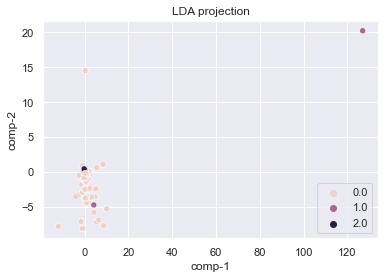

In [116]:
colors = ["navy", "darkorange","turquiose"] ;lw = 2 ; target_names = ['valid','fraud', 'fake']
x = X_scaled ; y = Y
#y[-7:-1] = 2
number_of_rows = x.shape[0]
random_indices = np.random.choice(number_of_rows, size=100000, replace=False)
x = x[random_indices, :]
y = y[random_indices]
y[-7:-1] = 2
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(x, y).transform(x)

'''
plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA ")

plt.show()
'''

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_r2[:,0]
df["comp-2"] = X_r2[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                #palette=sns.color_palette("hls", 2),
                data=df).set(title="LDA projection")

In [119]:


colors = ["navy", "darkorange","turquiose"] ;lw = 2 ; target_names = ['valid','fraud', 'fake']
x = X_scaled ; y = Y
#y[-7:-1] = 2
number_of_rows = x.shape[0]
random_indices = np.random.choice(number_of_rows, size=100000, replace=False)
x = x[random_indices, :]
y = y[random_indices]
y[-7:-1] = 2


from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np
qda = QuadraticDiscriminantAnalysis()
X_r2 = qda.fit(x, y).transform(x)
#lda = LinearDiscriminantAnalysis(n_components=2)
#X_r2 = lda.fit(x, y).transform(x)


df = pd.DataFrame()
df["y"] = y
df["comp-1"] = X_r2[:,0]
df["comp-2"] = X_r2[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                #palette=sns.color_palette("hls", 2),
                data=df).set(title="LDA projection")


AttributeError: 'QuadraticDiscriminantAnalysis' object has no attribute 'transform'

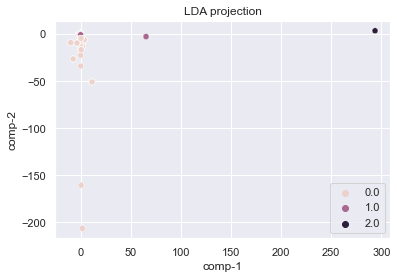

In [121]:
def d2_plot(x_lda,y,x):
    
    colors = ["navy", "darkorange","turquiose"] ;lw = 2 ; target_names = ['valid','fraud', 'fake']
    df = pd.DataFrame()
    df["y"] = y
    df["comp-1"] = x_lda[:,0]
    df["comp-2"] = x_lda[:,1]

    sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                    #palette=sns.color_palette("hls", 2),
                    data=df).set(title="LDA projection")
x = X_scaled ; y = Y

#number_of_rows = x.shape[0]
#random_indices = np.random.choice(number_of_rows, size=100000, replace=False)
#x = x[random_indices, :]
#y = y[random_indices]
y[-7:-1] = 2
lda = LinearDiscriminantAnalysis(n_components=2)
x_lda = lda.fit(x, y).transform(x)
d2_plot(x_lda,y,x)


In [29]:
x.dtype

dtype('float64')

In [30]:
y.dtype

dtype('float64')